# Learning objectives

In this Exercise, we will see how to: 

- Create custom array transform
- Create custom dictionary transform
- Create custom random transforms

# Installing dependencies

In [1]:
#@formatter:off
!python -c "import monai" || pip install -qU "monai[ignite, nibabel, torchvision, tqdm]==1.2.0"
#@formatter:on

# Verify your Configuration

Execute the following cell to check MONAI's configuration using MONAI's `print_config()`.

In [3]:
from monai.config import print_config

print_config()

MONAI version: 1.2.0
Numpy version: 1.26.1
Pytorch version: 2.1.0+cpu
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: c33f1ba588ee00229a309000e888f9817b4f1934
MONAI __file__: C:\Work\Projects\2023_10_19_Formation_Medical_AI_EPITA\venv\lib\site-packages\monai\__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.11
ITK version: 5.3.0
Nibabel version: 5.1.0
scikit-image version: 0.22.0
Pillow version: 10.1.0
Tensorboard version: 2.14.1
gdown version: 4.7.1
TorchVision version: 0.16.0+cpu
tqdm version: 4.66.1
lmdb version: 1.4.1
psutil version: 5.9.6
pandas version: 2.1.1
einops version: 0.7.0
transformers version: 4.21.3
mlflow version: 2.7.1
pynrrd version: 1.0.0

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies


# Creating Toy Data and Temp Directory for Examples

We'll create a temporary directory and populate it with a few example Nifti file-format images containing a random assortment of spheres.  We're also creating a matching segmentation pair that will be used later in the notebook.

In [4]:
from monai.data import create_test_image_3d
import tempfile
import nibabel as nib
import numpy as np

fn_keys = ("img", "seg")  # filename keys for image and seg files

root_dir = tempfile.mkdtemp()
print("Output temporary directory : ", root_dir)

filenames = []

for i in range(5):
    im, seg = create_test_image_3d(128, 128, 128, num_objs=16, rad_max=25)

    im_filename = f"{root_dir}/im{i}.nii.gz"
    seg_filename = f"{root_dir}/seg{i}.nii.gz"
    filenames.append({"img": im_filename, "seg": seg_filename})

    n = nib.Nifti1Image(im, np.eye(4))
    nib.save(n, im_filename)

    n = nib.Nifti1Image(seg, np.eye(4))
    nib.save(n, seg_filename)

Output temporary directory :  C:\Users\Thibault\AppData\Local\Temp\tmpzk82_6fz


# Custom Array Transform using a function

1. Create a function which sums the image over the X axis
2. Add this function at the end of the compose pipeline using the Lambda wrapper
3. Plot and compare the output with the unmodified image

torch.Size([1, 128, 128])
torch.Size([1, 128, 128, 128])


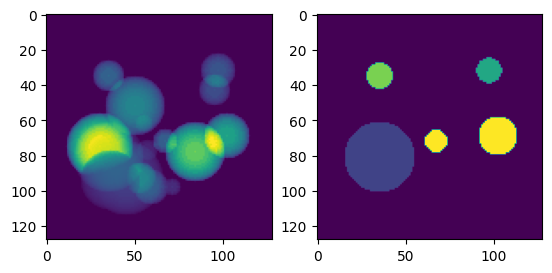

In [5]:
from monai.transforms import Compose, LoadImage, EnsureChannelFirst, Lambda
from matplotlib import pyplot as plt
%matplotlib inline

def sum_width(img):
    return fixMe


trans = Compose([fixMe])
img = trans(filenames[0]["img"])

# Load and show the image with the modification
print(img.shape)
plt.subplot(1, 2, 1)
plt.imshow(fixMe)

# Load and show the image without the sum_width function
trans = Compose([LoadImage(image_only=True), EnsureChannelFirst()])
img = trans(filenames[0]["img"])

print(img.shape)
plt.subplot(1, 2, 2)
plt.imshow(fixMe)


# Custom Array Transform using the Transform class

1. Create a class which inherits the `monai.transform.Transform` class
2. Add the dimension on which to sum the image in the classes's init
3. Override the `__call__` method to implement the sum and return the modified value
4. Call the compose dans display the image
5. Compare the outputs when using the sum over the X and Y dimensions


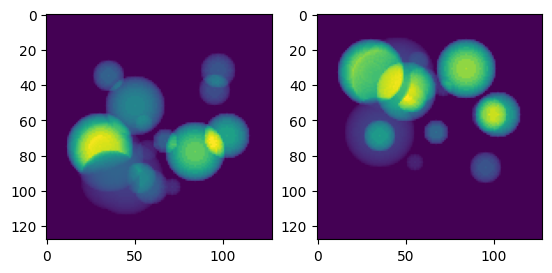

In [6]:
from monai.transforms import Transform


class SumDimension(Transform):
    fixMe


for d in [1, 2]:
    trans = Compose([fixMe])
    img = trans(filenames[0]["img"])
    plt.subplot(1, 2, d)
    plt.imshow(img[0])

# Custom Dictionary Transform using the Lambdad wrapper

1. Create a function which sums the image over the X axis
2. Create a function which outputs the max of the image over the X axis
3. Create a transform which loads image and segmentations, applies the sum for images and max for segmentations using the Lambdad wrapper
4. Plot and compare the outputs

monai.transforms.io.dictionary LoadImaged.__init__:image_only: Current default value of argument `image_only=False` has been deprecated since version 1.1. It will be changed to `image_only=True` in version 1.3.


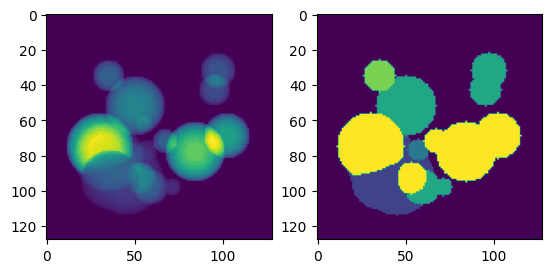

In [7]:
from monai.transforms import LoadImaged, EnsureChannelFirstd, Lambdad


def sum_width(img):
    fixMe


def max_width(img):
    fixMe


trans = Compose([fixMe])

data = trans(filenames[0])
img = fixMe
seg = fixMe

plt.subplot(1, 2, 1)
plt.imshow(img[0])
plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(seg[0]))

# Custom Dictionary Transform using the MapTransform class

1. Create a class which inherits from MapTransform and implements the sum over a given dim
2. In the call function, apply the function only to the given input keys
3. Compose a transform and apply the SumDimension to both image and segmentation



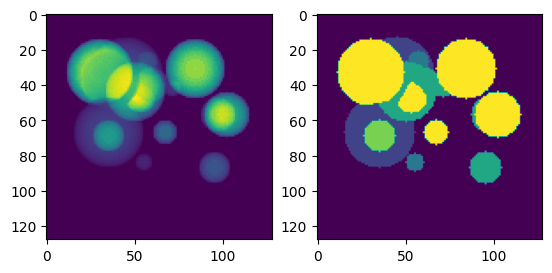

In [8]:
from monai.transforms import MapTransform
from copy import deepcopy


class SumDimensiond(MapTransform):
    fixMe


class MaxDimensiond(MapTransform):
    fixMe


trans = Compose([fixMe])
data = trans(filenames[0])
plt.subplot(1, 2, 1)
plt.imshow(data["img"][0])
plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(data["seg"][0]))


# Random transform

1. Create a random transform which sums either over X or over Y depending on the probability prob
2. Compose a transform and apply the SumDimension to both image and segmentation
3. Test the output when prob is 1 and when prob is 0


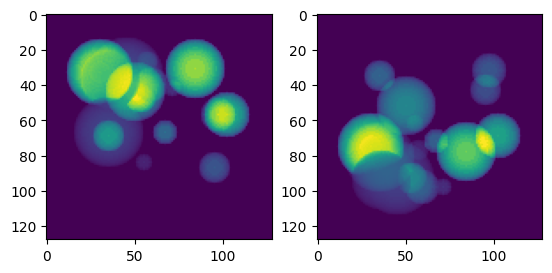

In [9]:
from monai.transforms import RandomizableTransform


class RandomSum(RandomizableTransform):
    fixMe


for p in [0, 1]:
    trans = Compose([fixMe])

    img = trans(filenames[0]["img"])
    plt.subplot(1, 2, p + 1)
    plt.imshow(img[0])
